# Introduction
The aim of this course work project is to create the best neural network to correctly classify a dataset consisting of 100 different classes of images. The previous coursework was limited to dense and dropout layers while this project will be able to apply the use of more advanced techniques. Convolutional neural networks will be trained and tuned as well as the use of transfer learning will be applied to this problem. 

## Dataset Information

The problem for this project is to correctly classify the images from the cifar100 dataset (1). This dataset consists of 100 different classes of images with each class having 500 images for training and 100 left for testing. This is a balanced dataset with a total of 60,000 images that are 32x32 color images. 

[Dataset Link]('https://www.cs.toronto.edu/%7Ekriz/cifar.html')

## Evaluation

The choice of an appropriate evaluation metric is dependent on the makeup of the dataset itself. This is a perfectly balanced dataset with each of the 100 classes having 600 occurrences. The use of accuracy or the area under the receiver operating characteristic curve would be appropriate for this particular dataset. Accuracy will be used in this case because it is an easier metric to understand for stakeholders who may be unfamiliar with data science terms and statistics. 

A commonsense baseline accuracy can be determined by the breakdown of the number of classes. In this case there are 100 evenly balanced classes. A random guess of the same class would be able to guess the correct result 1% of the time. A neural network classifier would need to be able to produce an accuracy better than this in order to conclude that the dataset does indeed contain sufficient information. 

This dataset is already split into a test and training dataset. The holdout test set contains 10,000 images, 100 of each class. The training set contains 500 images of each class for a total of 50,000 images. In order to tune a neural network classifier, the training set will be split into a training set and a validation set. A 20/80 split will be used with 20% of the training data being held out for validation. For each class of image, 400 will be used for training, 100 for validation, and a final 100 for the test set. Once the final network has been tuned and trained using the training and validation data, the model will be reinitialized with the validation data included before being tested on the test set. This will produce the final accuracy for our model for which to compare to the common sense baseline. 



1 - Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009

In [2]:
import keras 
from keras.callbacks import CSVLogger
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
from tensorflow.keras.datasets import cifar100

# Model Development
## Examine the Data

The dataset consists of images that are 32x32 color images (red, green, blue). There are 50,000 training images and 10,000 test images. The class labels are currently integer encoded,  each label is an integer ranging from 0 to 99. 

In [3]:
(train_images_og, train_labels_og), (test_images_og, test_labels_og) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [4]:
print('tensor shape')
print('\ttraining images:', train_images_og.shape)
print('\ttraining labels:', train_labels_og.shape)
print('\ttraining images:', train_images_og.dtype)
print('\ttraining labels:', train_labels_og.dtype)
print('\ttest images:', test_images_og.shape)
print('\ttest labels:', test_labels_og.shape)

tensor shape
	training images: (50000, 32, 32, 3)
	training labels: (50000, 1)
	training images: uint8
	training labels: int64
	test images: (10000, 32, 32, 3)
	test labels: (10000, 1)


### Show Samples

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


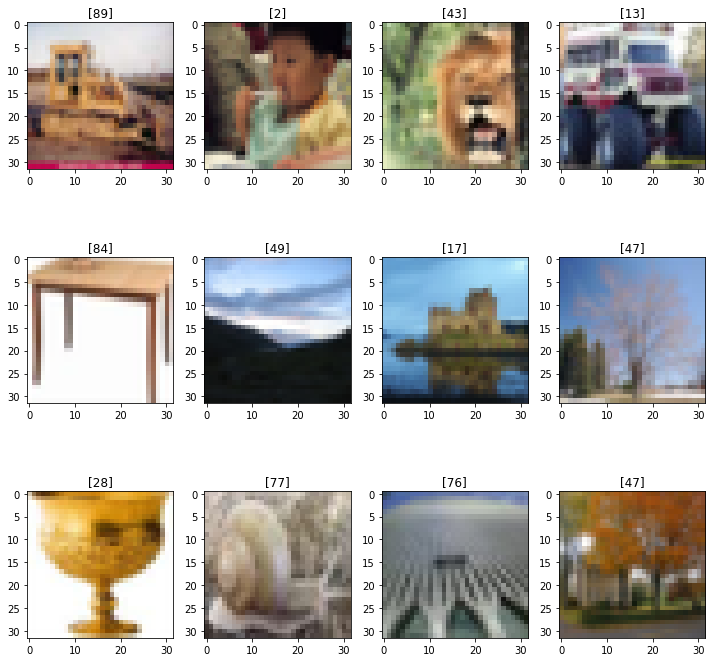

In [5]:
def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()
  
show_samples(train_images_og, train_labels_og)

## Preprocess Data
The labels will be transformed using one-hot encoding. This will create a vector of 0's with a 1 in the place of the correct label. This removes the ordered relationship that the classifier may misinterpret if left in. There is no ordered relationship between our classes and one-hot encoding removes the ordered relationship of the integer encoded labels. This is done with the use of ```keras.utils.to_categorical``` function. This will affect the shape of the labels as each label will be a vector of length 100 rather than a single integer. 

The images will need to be flattened. Previous coursework this was done before passing the images into the network, however in this report the rescaling layer will be used. This takes the image and rescales it to a float type in the range of 0-1 which the neural network will better understand. 

#### One-Hot Encode Labels


In [6]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels_og)
test_labels = to_categorical(test_labels_og)

print('\ttrain labels:', train_labels.shape)
print('\ttest labels:', test_labels.shape)

	train labels: (50000, 100)
	test labels: (10000, 100)


## Baseline Model

The last coursework was able to achieve an accuarcy of 25% on the cifar100 dataset while being limited to dense and dropout layers. The network consisted of 3 dense layers each with 1024 units with a final softmax output layer. A learning rate of 1e-4 and the Adam optimizer was used. This previous coursework model will serve as the baseline for this coursework. This will setup a good experiment to determine whether the use of convolutional layers and advanced computer vision techniques can improve upon the limited neural network constructed for the previous coursework. 



### Best model from CW1 to set baseline
Manually reshaping and rescaling the inputs for the previous coursework model is done to replicate results. When training new models for this coursework the use of the rescaling layer will be used.

#### Reshape Image Inputs for CW1 Network Baseline Model

In [7]:
train_images = train_images_og.reshape((50000, 32, 32, 3))
test_images = test_images_og.reshape((10000, 32, 32, 3))

In [8]:
train_images_flat = train_images_og.reshape((50000, 32*32*3)).astype('float32') / 255.
test_images_flat = test_images_og.reshape((10000, 32*32*3)).astype('float32') / 255.

In [ ]:
base_model = models.Sequential()
    
#first layer - needs input_shape
base_model.add(layers.Dense(1024, activation='relu', input_shape=(32 * 32 * 3, )))


# middle layers
base_model.add(layers.Dense(1024, activation='relu'))
base_model.add(layers.Dense(1024, activation='relu'))

# output layer
base_model.add(layers.Dense(100, activation='softmax'))

# 
base_model.compile(optimizer=keras.optimizers.Adam(0.0001),
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

base_model_history = base_model.fit(
    train_images_flat, 
    train_labels, 
    epochs=12, 
    verbose=2,
    validation_split=0.2
)


Base Model Validation Accuracy:  24.5 %


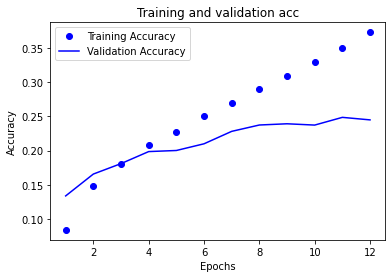

In [12]:
plot_train_val_acc(base_model_history)
print('Base Model Validation Accuracy: ', round(base_model_history.history['val_accuracy'][-1]*100,5),'%')


## Develop Model that Overfits
#### Small Base Convolutional Neural Network
The first model will exmine the effectiveness of a small base convolution neural network with a small number of filters. 
A standard window size of 3x3 with as stride of 1 will be used with no maxpooling layers included. 

In [13]:
def build_model_1():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(100, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_1 = build_model_1()

In [ ]:
model_1.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_1 = model_1.fit(
    train_images, 
    train_labels,
    epochs=10,
    verbose=2,
    validation_split=0.2
)

In [15]:
get_max_acc_min_loss_epoch(history_1, 'Model 1 - Base Convnet ')

Model 1 - Base Convnet 
Max Validation Accuracy:  29.630000000000003 %	 Num Epoch:  8
Min Validation Loss:  3.0446 		 Num Epoch:  5


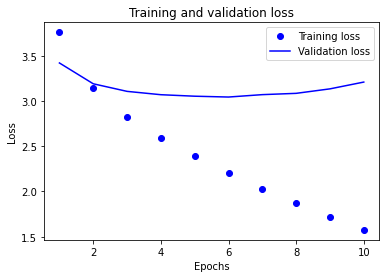

In [16]:
plot_train_val_loss(history_1)


Baseline convnet with 2 convolutional layers achieves a maximum validation accuracy of 29.63%. Already showing improvement over the baseline with no convolutional layers. 

#### Training and Validation Accuracy and Loss Plot Comparisions  


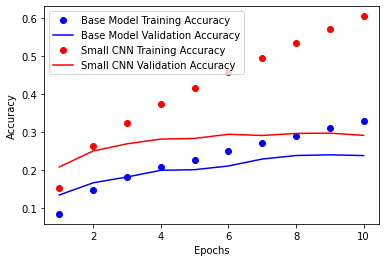

In [17]:
compare_acc(base_model_history, history_1, 'Base Model', 'Small CNN')

#### Add Max Pooling Layers to Conv2D layers
Maxpooling layers can help to reduce the number of paratemers a model can train. This can reduce overfitting. It also allows smaller windows in the final layers to be able to look at increasingly large windows of the image to help learn different features. A standard 2x2 window will be used effectively reducing the filter sizes in half. 

In [20]:
def build_model_2():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    outputs = layers.Dense(100, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_2 = build_model_2()

In [ ]:
model_2.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
    
)

history_2 = model_2.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

In [23]:
get_max_acc_min_loss_epoch(history_2, 'Model 2')

Model 2
Max Validation Accuracy:  36.88 %	 Num Epoch:  23
Min Validation Loss:  2.68999 		 Num Epoch:  14


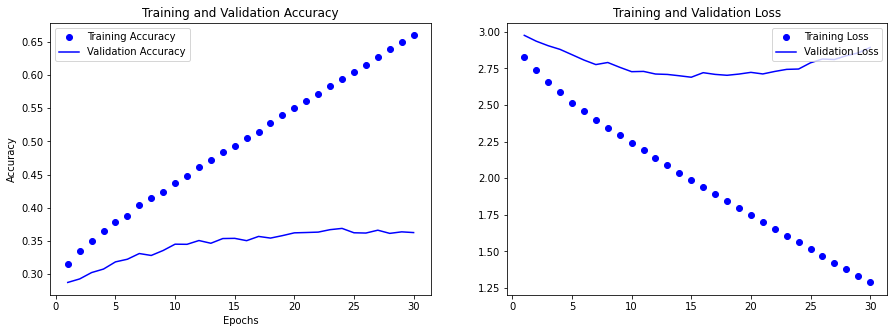

In [24]:
plot_val_loss_acc(history_2)

The addition of max pooling layers results in the model achievening a higher validation accuracy and lower training loss. The model takes more epochs to begin overfitting. 

### Add Dense Layer (3)
The addition of a dense layer after the convolutional layers can be used to aid the network in learning more about the image patterns that have been discovered through the convolutional filters. 

In [25]:
def build_model_3():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_3 = build_model_3()

In [ ]:
model_3.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_3 = model_3.fit(
    train_images, 
    train_labels,
    epochs=40,
    verbose=2,
    validation_split=0.2
)

Model 3
Max Validation Accuracy:  35.04 %	 Num Epoch:  32
Min Validation Loss:  2.76711 		 Num Epoch:  25


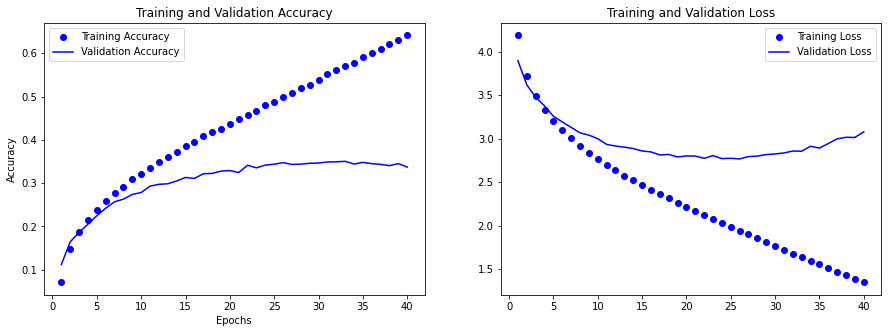

In [27]:
get_max_acc_min_loss_epoch(history_3, 'Model 3')
plot_val_loss_acc(history_3)

The addition of a single dense layer with 128 units at the end of the convolutional layers increases the validation accuracy to 36.5% from 34.5%. 

### Add Conv2D and MaxPooling Layer (4)
Test whether the addition of another convolutional and max pooling layer is needed to learn more patterns. 

In [ ]:
def build_model_4():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.Flatten()(x)
    
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_4 = build_model_4()

In [ ]:
model_4.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_4 = model_4.fit(
    train_images, 
    train_labels,
    epochs=40,
    verbose=2,
    validation_split=0.2
)

Model 4: 4 Conv2D Layers
Max Validation Accuracy:  35.199999999999996 %	 Num Epoch:  32
Min Validation Loss:  2.74412 		 Num Epoch:  27


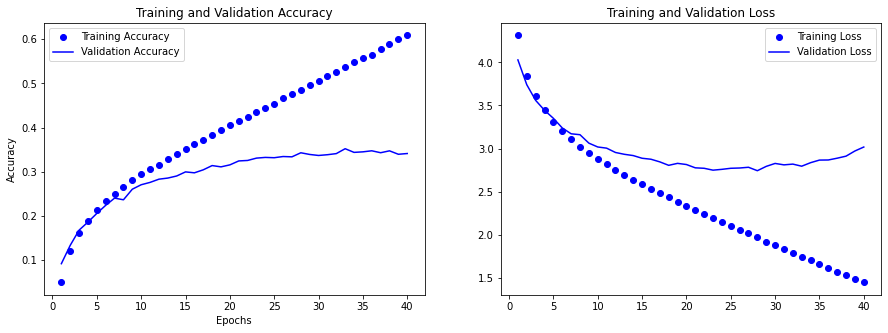

In [30]:
get_max_acc_min_loss_epoch(history_4, 'Model 4: 4 Conv2D Layers')
plot_val_loss_acc(history_4)

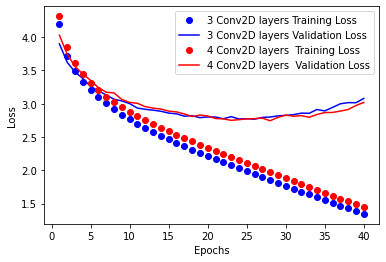

In [34]:
compare_loss(history_3, history_4, '3 Conv2D layers', '4 Conv2D layers ')


The model begins overfitting at 32 epochs and reaches a maximum accuarcy of 35.2% This is a very slight increase over 3 layers with an a accuracy of 35.0%. This is not significant enough of an increase for the increase in model complexity, which in turn requires a greater amount of computing power and training time.



### Kernal size 4 (5)

Increasing the size of the windows used in the convolutional layer has the effect of the layers learning larger patterns. 

In [41]:
def build_model_5():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=16, kernel_size=4, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=32, kernel_size=4, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=4, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_5 = build_model_5()

In [ ]:
model_5.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_5 = model_5.fit(
    train_images, 
    train_labels,
    epochs=40,
    verbose=2,
    validation_split=0.2
)

Model 5: Conv2D 4x4 Kernal
Max Validation Accuracy:  34.14 %	 Num Epoch:  28
Min Validation Loss:  2.77552 		 Num Epoch:  18


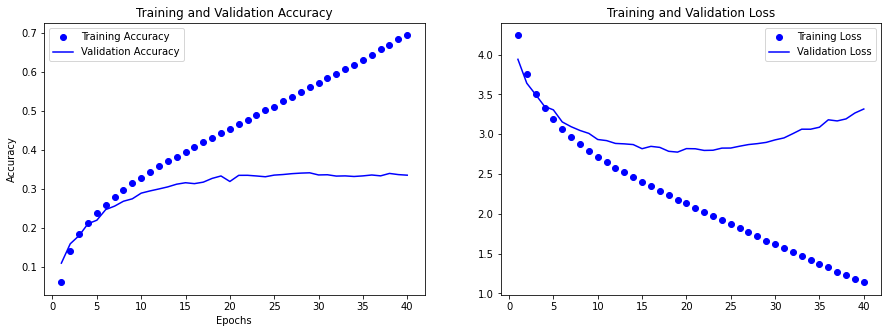

In [43]:
get_max_acc_min_loss_epoch(history_5, 'Model 5: Conv2D 4x4 Kernal')
plot_val_loss_acc(history_5)


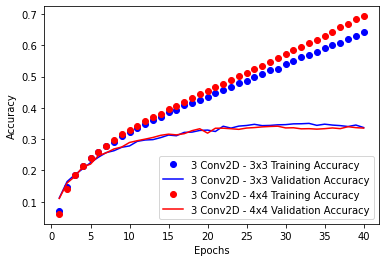

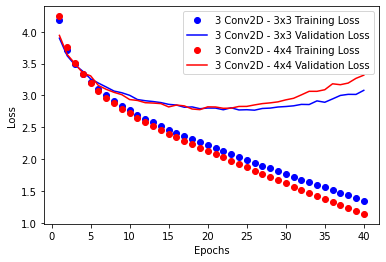

In [44]:
compare_acc(history_3, history_5, '3 Conv2D - 3x3', '3 Conv2D - 4x4')
compare_loss(history_3, history_5, '3 Conv2D - 3x3', '3 Conv2D - 4x4')



The increase in window (kernal) size results in a model that begins overfitting sooner after 18 epochs. The accuarcy slightly decreases as well so we will continue with the 3x3 window size. 

### Higher and Lower Learning Rates (6,7)

Experiment to determine the optimal learning rate. A learning rate that is too high could miss a proper fit during the gradient descent algorithm. A learning rate that is too low could be too slow to learn and result in a stalled out learning process.

In [ ]:
model_6 = build_model_3()

model_6.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_6 = model_6.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

Model 6: Learning Rate 1e-3
Max Validation Accuracy:  35.61 %	 Num Epoch:  7
Min Validation Loss:  2.61561 		 Num Epoch:  5


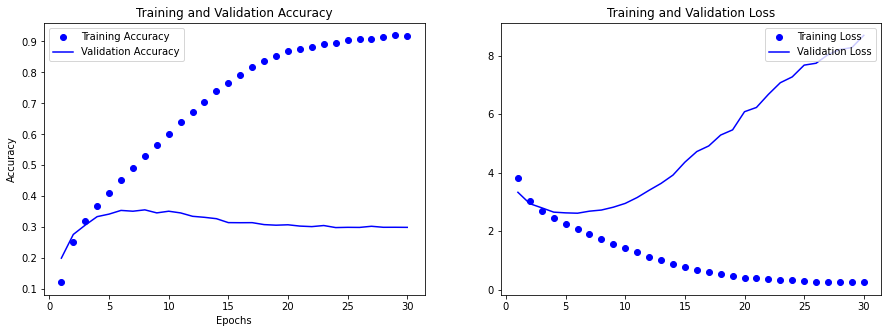

In [46]:
get_max_acc_min_loss_epoch(history_6, 'Model 6: Learning Rate 1e-3')
plot_val_loss_acc(history_6)

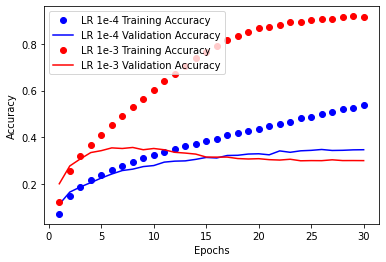

In [47]:
compare_acc(history_3, history_6, 'LR 1e-4', 'LR 1e-3')


The higher learning rate appears to reach its peak accuracy too soon, this is the risk of increasing the learning rate. It skips over the optimum fit and begins to overfit much to soon. 

In [ ]:
model_7 = build_model_3()

model_7.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_7 = model_7.fit(
    train_images, 
    train_labels,
    epochs=100,
    verbose=2,
    validation_split=0.2
)

Model 7: Learning Rate 1e-5
Max Validation Accuracy:  26.529999999999998 %	 Num Epoch:  94
Min Validation Loss:  3.08353 		 Num Epoch:  99


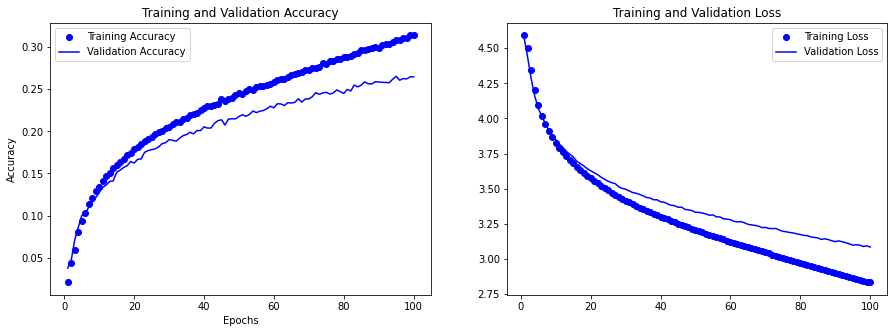

In [49]:
get_max_acc_min_loss_epoch(history_7, 'Model 7: Learning Rate 1e-5')
plot_val_loss_acc(history_7)

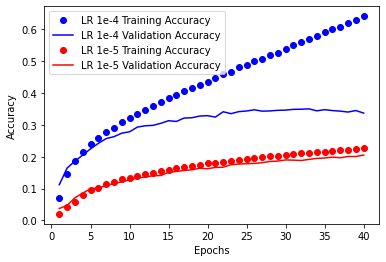

In [50]:
compare_acc(history_3, history_7, 'LR 1e-4', 'LR 1e-5')

Learning rate of 1e-4 much better than 1e-5 even after running for 100 epochs. Evident validation accuracy for 1e-5 has stalled out. A learning rate of 1e-4 proved to be the best option. 

### Increase Starting Filter Sizes (8)

Increasing the amount of filters used in each convolutional layer could allow the network to learn more patterns in the data and increase overall accuracy. However, too many and this could lead to overfitting. 

In [52]:
def build_model_8():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_8 = build_model_8()


In [ ]:
model_8.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_8 = model_8.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

Model 8: Layer 1 32 Filters
Max Validation Accuracy:  38.03 %	 Num Epoch:  18
Min Validation Loss:  2.57872 		 Num Epoch:  18


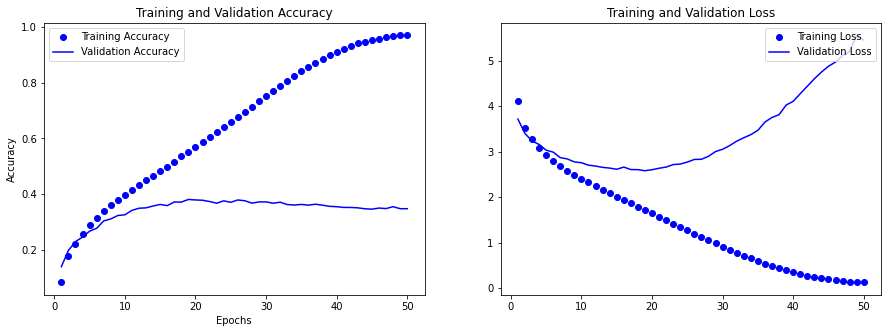

In [55]:
get_max_acc_min_loss_epoch(history_8, 'Model 8: Layer 1 32 Filters')
plot_val_loss_acc(history_8)

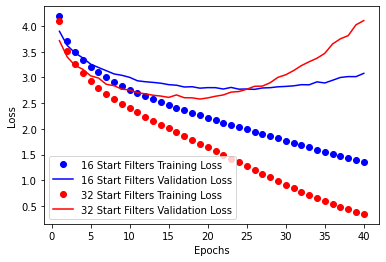

In [57]:
compare_loss(history_3, history_8, '16 Start Filters','32 Start Filters')

Increasing the starting convolutional layer filters paramater to 32 units increases the validation accuracy. Model begins overfitting at 18 epochs when validation loss is minimized. 

In [59]:
def build_model_8b():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_8b = build_model_8b()

In [ ]:
model_8b.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_8b = model_8b.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

Model 8b: Layer 1 128 Filters
Max Validation Accuracy:  37.69 %	 Num Epoch:  11
Min Validation Loss:  2.63424 		 Num Epoch:  8
Model 8: Layer 1 64 Filters
Max Validation Accuracy:  38.03 %	 Num Epoch:  18
Min Validation Loss:  2.57872 		 Num Epoch:  18


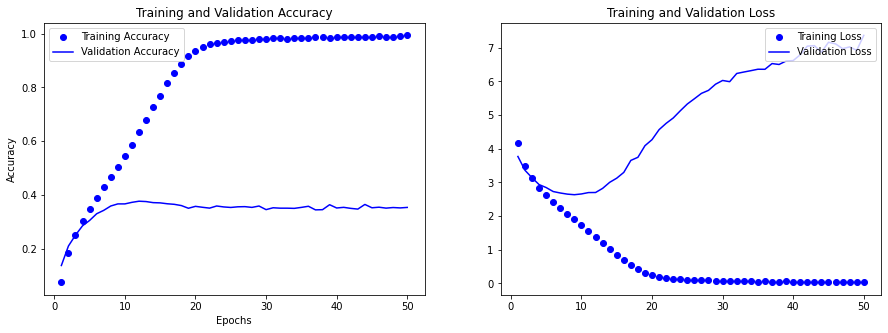

In [65]:
get_max_acc_min_loss_epoch(history_8b, 'Model 8b: Layer 1 128 Filters')
get_max_acc_min_loss_epoch(history_8, 'Model 8: Layer 1 64 Filters')
plot_val_loss_acc(history_8b)

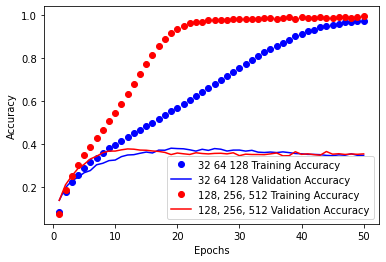

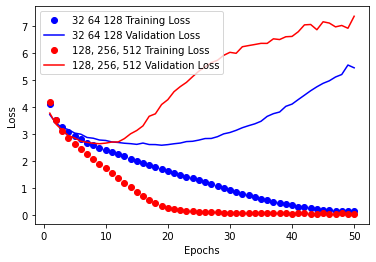

In [68]:
compare_acc(history_8, history_8b, '32 64 128','128, 256, 512')
compare_loss(history_8, history_8b, '32 64 128','128, 256, 512')

The network with 64, 128, and 256 filters outperformed the model with 128, 256, and 512 units. This model began overfitting very quickly after 8 epochs. 


### Remove Padding (9)


In [69]:
def build_model_9():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model_9 = build_model_9()

In [ ]:
model_9.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_9 = model_9.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

Model 9: No Padding
Max Validation Accuracy:  36.04 %	 Num Epoch:  43
Min Validation Loss:  2.70146 		 Num Epoch:  26


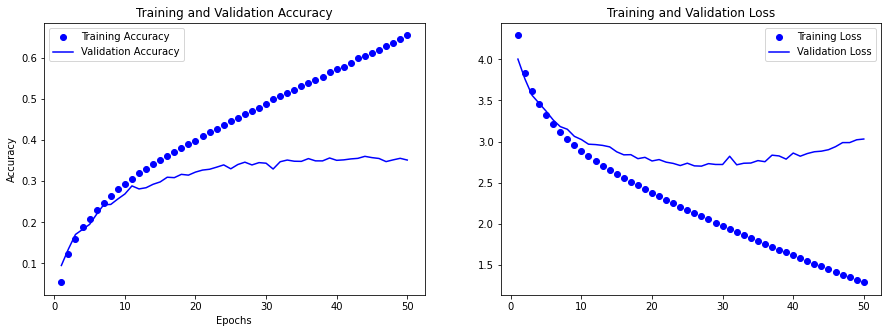

In [73]:
get_max_acc_min_loss_epoch(history_9, 'Model 9: No Padding')
plot_val_loss_acc(history_9)

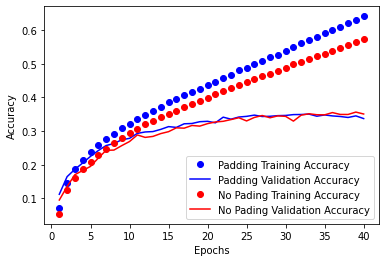

In [74]:
compare_acc(history_3, history_9, 'Padding','No Pading')

Use of padding is more accurate and has lower loss so keep padding. 

Best Model is currently 8. Compare with that going forward. 

### 4 Conv2D Layers with 8 Base (10)

In [78]:
def build_model_10():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=512, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_10_4_Conv2d_layers')
    return model

model_10 = build_model_10()

In [ ]:
model_10.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_10 = model_10.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

Model 10: 4 Conv2D  
Max Validation Accuracy:  37.25 %	 Num Epoch:  13  
Min Validation Loss:  2.62167 		 Num Epoch:  9  
Model 8: 3 Conv2D  
Max Validation Accuracy:  38.03 %	 Num Epoch:  18  
Min Validation Loss:  2.57872 		 Num Epoch:  18  

Model 10: 4 Conv2D
Max Validation Accuracy:  37.25 %	 Num Epoch:  13
Min Validation Loss:  2.62167 		 Num Epoch:  9
Model 8: 3 Conv2D
Max Validation Accuracy:  38.03 %	 Num Epoch:  18
Min Validation Loss:  2.57872 		 Num Epoch:  18


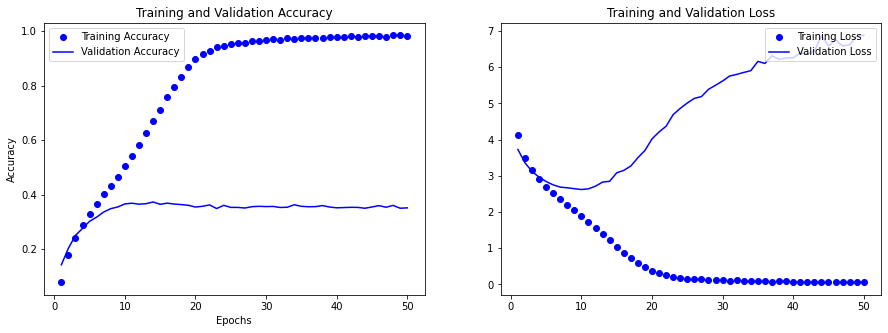

In [80]:
get_max_acc_min_loss_epoch(history_10, 'Model 10: 4 Conv2D')
get_max_acc_min_loss_epoch(history_8, 'Model 8: 3 Conv2D')
plot_val_loss_acc(history_10)

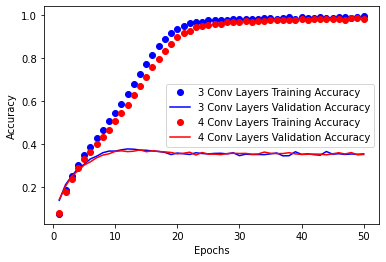

In [81]:
compare_acc(history_8b, history_10, '3 Conv Layers','4 Conv Layers')

3 layers more accurate so use that going forward.

### Data Augmentation (Aug)
The use of data augmentation can have the effect of reducing overfitting by creating more noise in the training data and making the model more resiliant to new data. 


In [ ]:
data_augmentation = keras.Sequential([
      layers.RandomFlip('horizontal_and_vertical', input_shape=(32,32,3)),
      layers.RandomRotation(0.2),
      layers.RandomZoom(0.2)
])

def build_model_augment_1():
    inputs = keras.Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)

    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)

    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='model_augment_1')
    return model

model_augment_1 = build_model_augment_1()

In [ ]:
model_augment_1.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_augment_1 = model_augment_1.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

Model: Augmentation
Max Validation Accuracy:  38.67 %	 Num Epoch:  16
Min Validation Loss:  2.58126 		 Num Epoch:  13
Model: No Augmentation
Max Validation Accuracy:  38.03 %	 Num Epoch:  18
Min Validation Loss:  2.57872 		 Num Epoch:  18


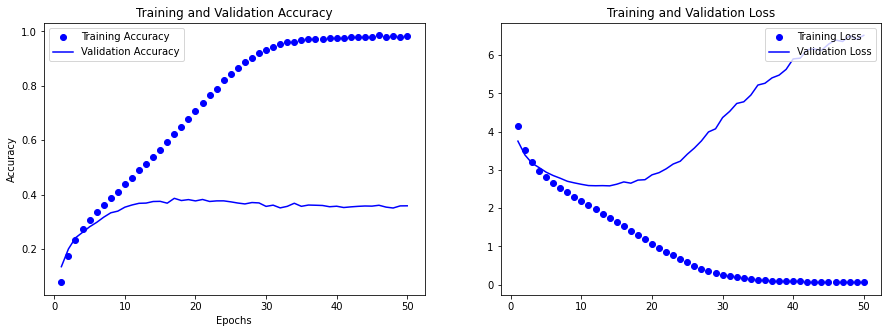

In [86]:
get_max_acc_min_loss_epoch(history_augment_1, 'Model: Augmentation')
get_max_acc_min_loss_epoch(history_8, 'Model: No Augmentation')
plot_val_loss_acc(history_augment_1)

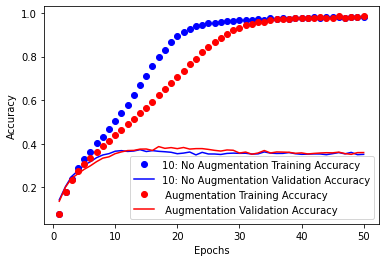

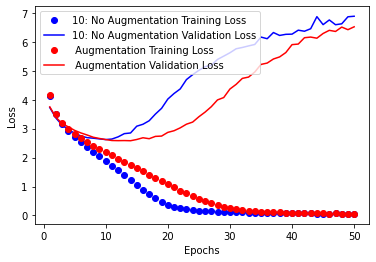

In [85]:
compare_acc(history_8, history_augment_1, '8: No Augmentation',' Augmentation')
compare_loss(history_8, history_augment_1, '8: No Augmentation',' Augmentation')


Image augmentation did result in a slightly higher accuracy and a model that was slower to overfit taking 13 epochs. 

### More Dense Layers w. Dropout (11)

Try increasing the model size again with an additional dense and dropout layer. Unable to include data augmentation preprocessing going forward due to bug with Keras (https://github.com/keras-team/keras-cv/issues/291).

In [109]:
def build_model_11():
    inputs = keras.Input(shape=(32, 32, 3))

    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_Augmentation_W_Dropout')
    return model

model_11 = build_model_11()

In [ ]:
model_11.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_11 = model_11.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

**Model 11: Dense Layers w. Dropout**    
Max Validation Accuracy:  45.34 %	 Num Epoch:  26  
Min Validation Loss:  2.18037 		 Num Epoch:  19

Model 11: Dense Layers w. Dropout
Max Validation Accuracy:  45.34 %	 Num Epoch:  26
Min Validation Loss:  2.18037 		 Num Epoch:  19


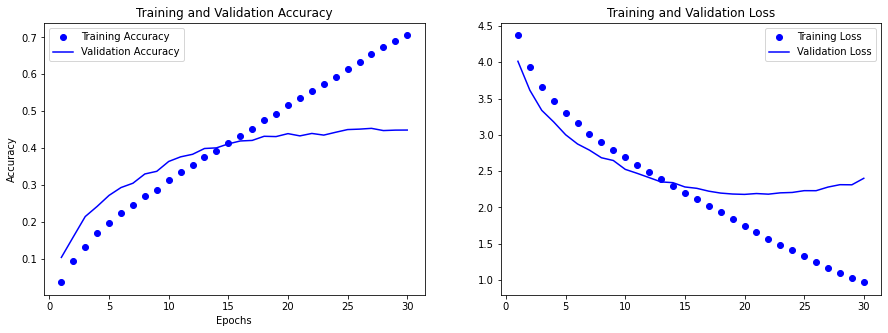

In [111]:
get_max_acc_min_loss_epoch(history_11, 'Model 11: Dense Layers w. Dropout')
plot_val_loss_acc(history_11)

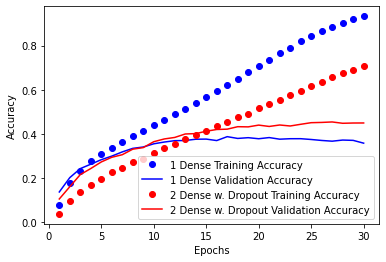

In [112]:
compare_acc(history_augment_1, history_11, '1 Dense','2 Dense w. Dropout')

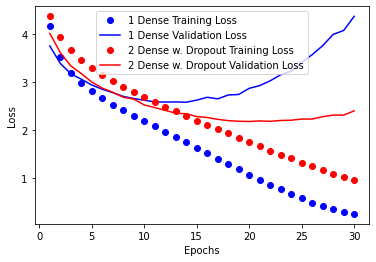

In [113]:

compare_loss(history_augment_1, history_11, '1 Dense','2 Dense w. Dropout')

Adding dropout layers and more dense layers large improvement increasing the accuracy of the model up to 45%. Previously the best model's accuracy was 38.7%.

### Increase Dense Units (12)

In [114]:
def build_model_12():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same')(x)
    
    x = layers.Flatten()(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_12_2_Dense_w_dropout')
    return model

model_12 = build_model_12()

In [ ]:
model_12.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_12 = model_12.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

Model 12: 2 Dense Layers 1024 - 1024
Max Validation Accuracy:  45.300000000000004 %	 Num Epoch:  23
Min Validation Loss:  2.17992 		 Num Epoch:  15
Model 11: 2 Dense Layers 512 - 512
Max Validation Accuracy:  45.34 %	 Num Epoch:  26
Min Validation Loss:  2.18037 		 Num Epoch:  19


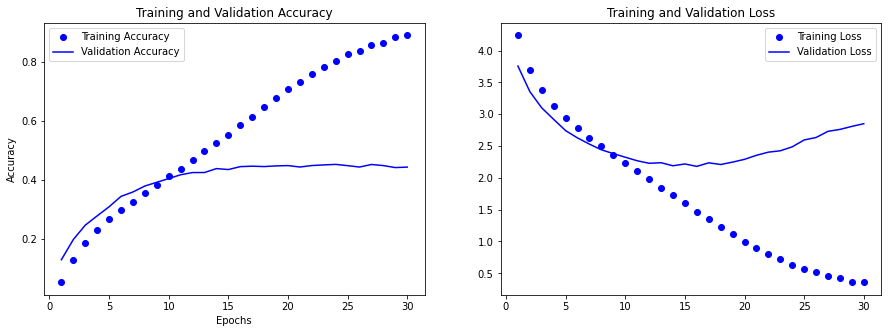

In [116]:
get_max_acc_min_loss_epoch(history_12, 'Model 12: 2 Dense Layers 1024 - 1024')
get_max_acc_min_loss_epoch(history_11, 'Model 11: 2 Dense Layers 512 - 512')
plot_val_loss_acc(history_12)

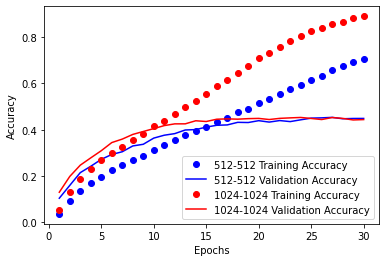

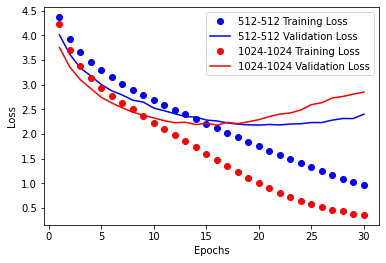

In [119]:
compare_acc(history_11, history_12, '512-512','1024-1024')
compare_loss(history_11, history_12, '512-512','1024-1024')

Adding another dense layer with a dropout layer did not show any significant improvement to the model. The model showed to be overfitting sooner at 15 epochs rather than 19. Accuracy stayed the same. Will use the smaller model as less parameters to train. 


### Batch Normalization (13)

Test the use of batch normalization layers to reduce overfitting. 


In [121]:
def build_model_13():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    
    x = layers.Conv2D(filters=64, kernel_size=3, use_bias=False, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=128, kernel_size=3, use_bias=False, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(2)(x)
    
    x = layers.Conv2D(filters=256, kernel_size=3, use_bias=False, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
        
    x = layers.Flatten()(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_13_Batch_Normalization')
    return model

model_13 = build_model_13()

In [ ]:
model_13.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_13 = model_13.fit(
    train_images, 
    train_labels,
    epochs=30,
    verbose=2,
    validation_split=0.2
)

Model 15: Batch Normalization
Max Validation Accuracy:  38.46 %	 Num Epoch:  26
Min Validation Loss:  2.43045 		 Num Epoch:  26
Model 11: No Batch Normalization
Max Validation Accuracy:  45.34 %	 Num Epoch:  26
Min Validation Loss:  2.18037 		 Num Epoch:  19


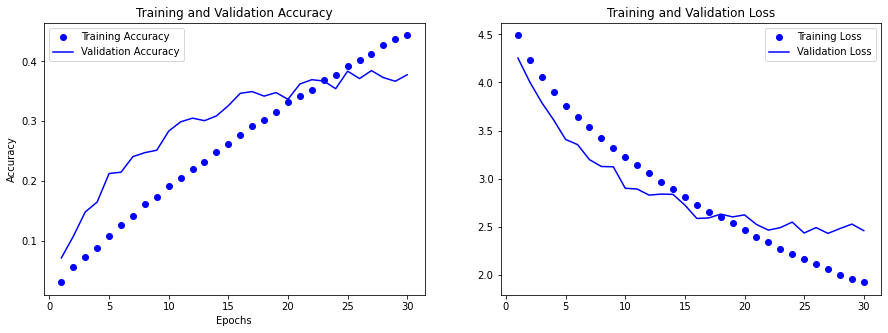

In [123]:
get_max_acc_min_loss_epoch(history_13, 'Model 15: Batch Normalization')
plot_val_loss_acc(history_13)

Batch Normalization did not improve model. Accuracy dropped from 45% to 38%. 

### Residuals (14)

In [4]:
def build_model_14():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    
    def residual_block(x, filters, pooling=False): 
      residual = x
      x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
      x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
      if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual) 
      elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual) 
      x = layers.add([x, residual])
      return x
    
    x = residual_block(x, 64, pooling=True)
    x = residual_block(x, 128, pooling=True)
    x = residual_block(x, 256, pooling=True)
    
    x = layers.GlobalAveragePooling2D()(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_14_Residuals')
    return model

model_14 = build_model_14()


In [ ]:
model_14.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_14 = model_14.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

Model 14: Residuals
Max Validation Accuracy:  49.34 %	 Num Epoch:  41
Min Validation Loss:  1.96277 		 Num Epoch:  29
Model 11: No Residuals
Max Validation Accuracy:  45.34 %	 Num Epoch:  26
Min Validation Loss:  2.18037 		 Num Epoch:  19


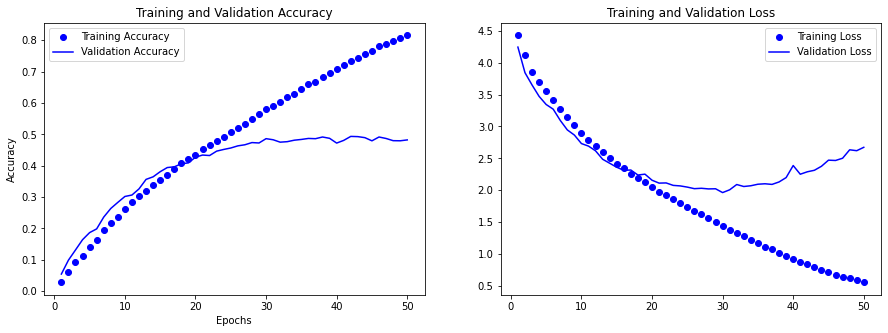

In [135]:
get_max_acc_min_loss_epoch(history_14, 'Model 14: Residuals')
get_max_acc_min_loss_epoch(history_11, 'Model 11: No Residuals')
plot_val_loss_acc(history_14)

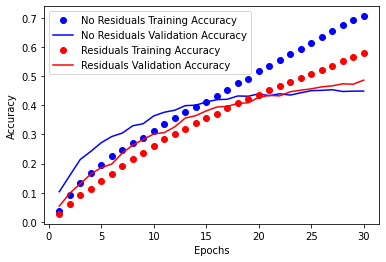

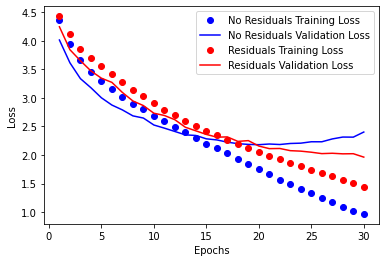

In [134]:
compare_acc(history_11, history_14, 'No Residuals','Residuals')
compare_loss(history_11, history_14, 'No Residuals','Residuals')

The addition of resudiuals made a significant improvement to the model. The use of residuals helps to reduce the noise that gets propogated through a network through successive layers. As the model begins to grow with more layers, the more the noise of each layer can affect the final output. Adding the residuals back into the model helps to keep the base information in tact and successively adds to the predictive accuracy of this network. This model achieved an accuarcy of 49% and began overfitting at 29 epochs. 




### Depthwise Separable Convolution Layers (15)

In [136]:
def build_model_15():
    inputs = keras.Input(shape=(32, 32, 3))
    
    x = layers.Rescaling(1./255)(inputs) 
    # need a conv2d layer to begin to handle color
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)

    def residual_block(x, filters, pooling=False): 
      residual = x
      x = layers.SeparableConv2D(filters, 3, activation="relu", padding="same")(x)
      x = layers.SeparableConv2D(filters, 3, activation="relu", padding="same")(x)
      if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual) 
      elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual) 
      x = layers.add([x, residual])
      return x
    
    x = residual_block(x, 64, pooling=True)
    x = residual_block(x, 128, pooling=True)
    x = residual_block(x, 256, pooling=False)

    x = layers.Flatten()(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)


    outputs = layers.Dense(100, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='Model_16_Residuals')
    
    return model


model_15 = build_model_15()


In [ ]:
model_15.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_15 = model_15.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

Model 15: Seperable Conv2d
Max Validation Accuracy:  38.09 %	 Num Epoch:  44
Min Validation Loss:  2.53536 		 Num Epoch:  22
Model 14: Conv2d
Max Validation Accuracy:  49.34 %	 Num Epoch:  41
Min Validation Loss:  1.96277 		 Num Epoch:  29


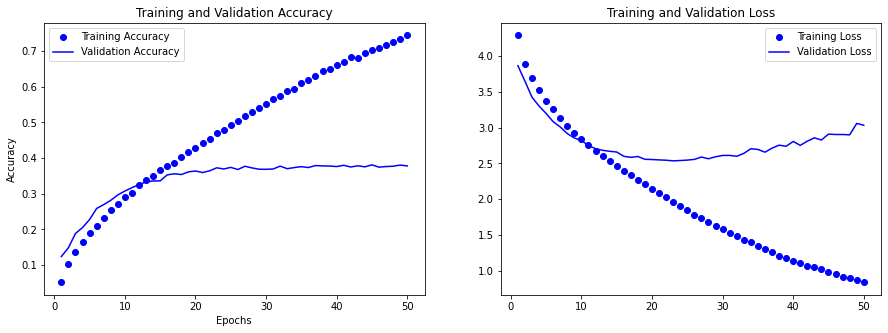

In [138]:
get_max_acc_min_loss_epoch(history_15, 'Model 15: Seperable Conv2d')
get_max_acc_min_loss_epoch(history_14, 'Model 14: Conv2d')
plot_val_loss_acc(history_15)

The use of seperable convolution layers did not improve the model.  

## Pretrained model

The use of a model that has been previously trained can produce promising results. The vgg16 neural network model has been trained on much more data than this dataset and we can use that base to build off of for our dataset. By harnesing the patterns already learned in vgg16, there is a potential to be able to apply that knowledge to this dataset for an even more accurate model.

### Base Pretrained VGG16 (16, 17)

In [141]:
base_model_vgg16 = keras.applications.vgg16.VGG16(
    weights='imagenet',
    input_shape = (32,32,3),
    include_top=False
)

def build_ft_model_1():
    
    base_model_vgg16.trainable=False

    inputs = keras.Input(shape=(32, 32, 3))
   
    x = keras.applications.vgg16.preprocess_input(inputs)

    x = base_model_vgg16(x, training=False)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(2048, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(100, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name='FT_Model')

    return model

ft_model_1 = build_ft_model_1()

In [ ]:
ft_model_1.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_ft_1 = ft_model_1.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

In [ ]:
ft_model_2 = build_ft_model_1()

base_model_vgg16.trainable = True
for layer in base_model_vgg16.layers[:-4]:
 layer.trainable = False

ft_model_2.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_ft_2 = ft_model_2.fit(
    train_images, 
    train_labels,
    epochs=40,
    verbose=2,
    validation_split=0.2
)


Model 18: Vgg16
Max Validation Accuracy:  42.120000000000005 %	 Num Epoch:  49
Min Validation Loss:  2.2563 		 Num Epoch:  48
Model 14: Self Trained
Max Validation Accuracy:  49.34 %	 Num Epoch:  41
Min Validation Loss:  1.96277 		 Num Epoch:  29


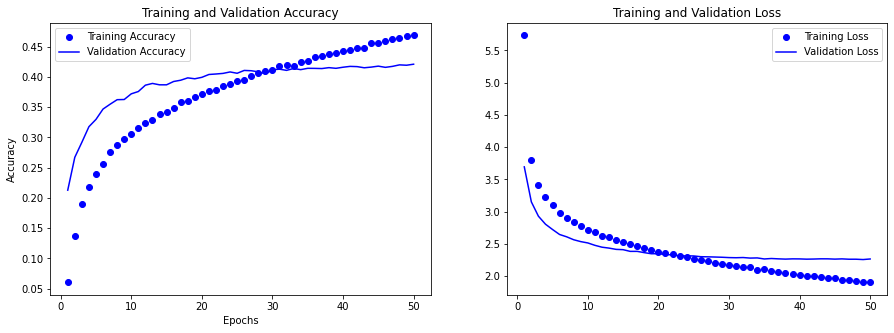

In [153]:
get_max_acc_min_loss_epoch(history_ft_1, 'Model 18: Vgg16')
get_max_acc_min_loss_epoch(history_14, 'Model 14: Self Trained')
plot_val_loss_acc(history_ft_1)

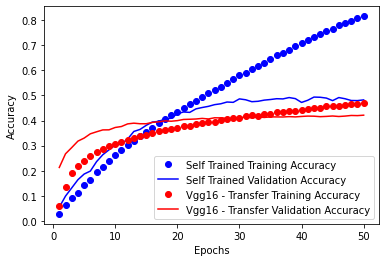

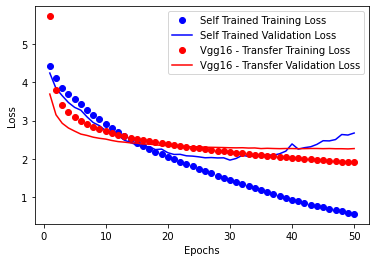

In [154]:
compare_acc(history_14, history_ft_1, 'Self Trained', 'Vgg16 - Transfer')
compare_loss(history_14, history_ft_1, 'Self Trained', 'Vgg16 - Transfer')

### Unfreeze last 3 layers and Lower Learning Rate
Fine tune model but opening last 3 layers but lower learning rate so no major adjustments made.


In [ ]:
ft_model_2 = build_ft_model_1()


base_model_vgg16.trainable = True
for layer in base_model_vgg16.layers[:-4]:
 layer.trainable = False


ft_model_2.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_ft_2 = ft_model_2.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)

Model 19: Vgg16 FT
Max Validation Accuracy:  48.11 %	 Num Epoch:  47
Min Validation Loss:  2.51999 		 Num Epoch:  12
Model 18: Vgg16
Max Validation Accuracy:  42.120000000000005 %	 Num Epoch:  49
Min Validation Loss:  2.2563 		 Num Epoch:  48


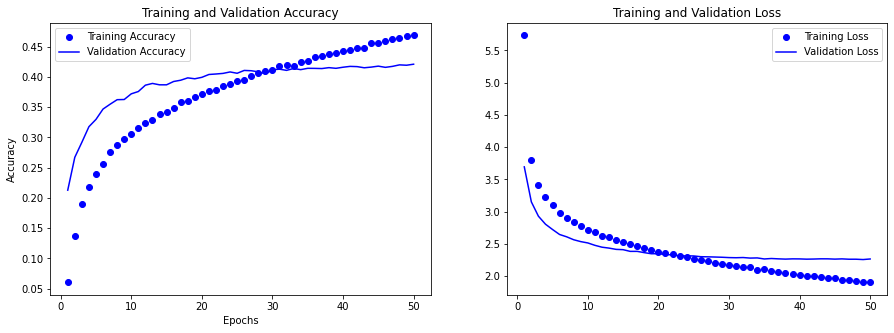

In [147]:
get_max_acc_min_loss_epoch(history_ft_2, 'Model 19: Vgg16 FT')
get_max_acc_min_loss_epoch(history_ft_1, 'Model 18: Vgg16')
plot_val_loss_acc(history_ft_1)

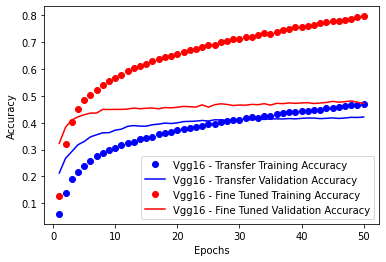

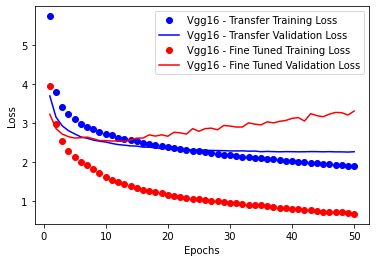

In [148]:
compare_acc(history_ft_1, history_ft_2, 'Vgg16 - Transfer', 'Vgg16 - Fine Tuned')
compare_loss(history_ft_1, history_ft_2, 'Vgg16 - Transfer', 'Vgg16 - Fine Tuned')

Custom model still better

### Unfreeze model
After the model has been trained once through, the model can be unfrozen and set to a lower learning rate. This will allow some further fine tuning of the model to our dataset. The lower learning rate ensures no big changes are made from the new data to the base vgg16 layers. 

In [ ]:
base_model_vgg16.trainable = True
ft_model_2.summary()

In [ ]:
ft_model_2.compile(
    optimizer=keras.optimizers.Adam(1e-5),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

history_ft_3 = ft_model_2.fit(
    train_images, 
    train_labels,
    epochs=50,
    verbose=2,
    validation_split=0.2
)


Model 19: Vgg16 FT 2
Max Validation Accuracy:  52.71 %	 Num Epoch:  49
Min Validation Loss:  2.92637 		 Num Epoch:  7
Model 18: Vgg16 FT 1
Max Validation Accuracy:  48.11 %	 Num Epoch:  47
Min Validation Loss:  2.51999 		 Num Epoch:  12


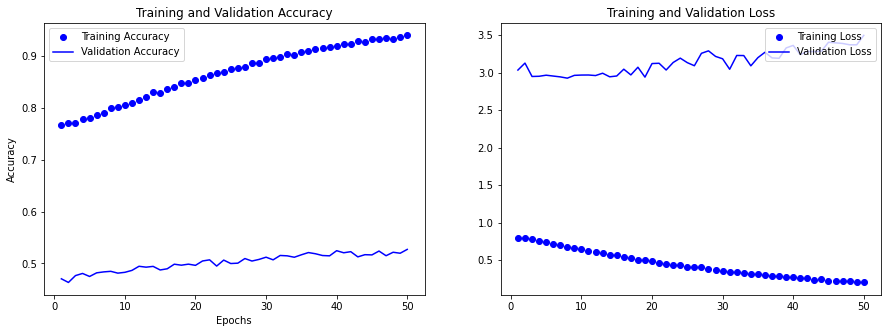

In [155]:
get_max_acc_min_loss_epoch(history_ft_3, 'Model 19: Vgg16 FT 2')
get_max_acc_min_loss_epoch(history_ft_2, 'Model 18: Vgg16 FT 1')
plot_val_loss_acc(history_ft_3)

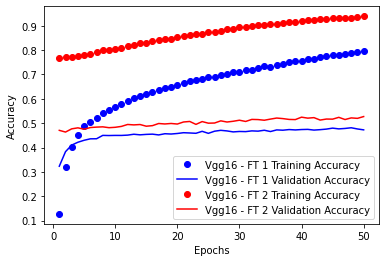

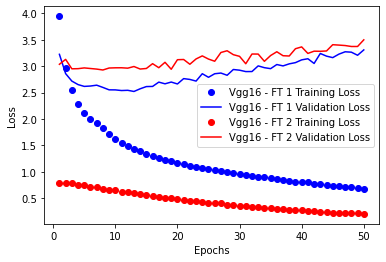

In [156]:
compare_acc(history_ft_2, history_ft_3, 'Vgg16 - FT 1', 'Vgg16 - FT 2')
compare_loss(history_ft_2, history_ft_3, 'Vgg16 - FT 1', 'Vgg16 - FT 2')

After unfreezing the model, the validation never decreases so the model is already overfitting from the first epoch. 

## Final Model

The custom model 14 proved to be the best trained model with a validation accuarcy of 49.3% and a clear dip in validation loss. Fine tuning the vgg16 model was able to produce a validation accuarcy score of 48.1%. In order to test our final model, it will be retrained using all the training data, this includes the validation data previously held out. Then the model will be evaluated on the holdout test data that has not previousyl been used. 

### Final Self-Trained Model (16)

The model will be trained for 29 epochs because this is when it began to show overfitting. 

Final Model
Max Validation Accuracy:  49.34 %	 Num Epoch:  41
Min Validation Loss:  1.96277 		 Num Epoch:  29


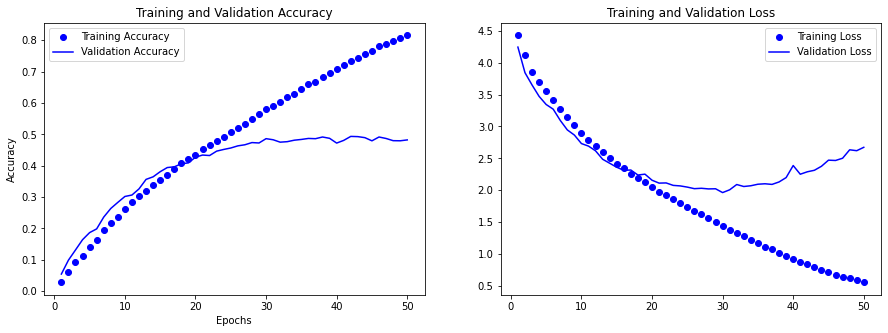

In [159]:
get_max_acc_min_loss_epoch(history_14, 'Final Model')
plot_val_loss_acc(history_14)

In [158]:
final_model_self_trained = build_model_14()
final_model_self_trained.summary()


Model: "Model_14_Residuals"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_47 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling_38 (Rescaling)       (None, 32, 32, 3)    0           ['input_47[0][0]']               
                                                                                                  
 conv2d_136 (Conv2D)            (None, 32, 32, 64)   1792        ['rescaling_38[0][0]']           
                                                                                                  
 conv2d_137 (Conv2D)            (None, 32, 32, 64)   36928       ['conv2d_136[0][0]']             
                                                                                 

In [ ]:
final_model_self_trained.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss = 'categorical_crossentropy',
    metrics=['accuracy'],
)

final_model_self_trained.fit(
    train_images, 
    train_labels,
    epochs=29,
    verbose=2,
)

#### Evaluate Model On Test Data

In [161]:
final_results_self_trained = final_model_self_trained.evaluate(test_images, test_labels)
print('Final Pre-trained Model Accuracy: ', round(final_results_self_trained[1]*100,2),'%')
print('Final Pre-trained Model Loss: ', final_results_self_trained[0])

313/313 [==============================] - 2s 5ms/step - loss: 1.8042 - accuracy: 0.5256
Final Pre-trained Model Accuracy:  52.56 %
Final Pre-trained Model Loss:  1.8041572570800781


## Conclusion

The final custom model was able to achieve an accuarcy of 52.56% on the hold out test data. This is a very good improvement over the previous coursework model which was only able to achieve an accuarcy of 24.5%. The use of more advanced computer vision neural network techniques has been able to double the accuracy. The final model architecture consisted of 3 blocks of convolutional layers, max pooling layers, and residuals. The output from the convolutional blocks was fed into a GlobalAveragePooling2D layer. This was then fed into 2 dense (512 units) and dropout (0.5) layer combinations before being output into the final dense softmax layer. 

# Apendix Code

### Chart Plotting Code



In [ ]:
def plot_train_val_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()
    
def plot_train_val_acc(history):
    plt.clf()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
        
    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
        
    plt.plot(epochs, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

def plot_val_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)
    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    # plt.plot(epochs_range, acc, label='Training Accuracy')
    # plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    
 
    plt.plot(epochs_range, acc, blue_dots, label = 'Training Accuracy')
    plt.plot(epochs_range, val_acc, solid_blue_line, label = 'Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, blue_dots, label='Training Loss')
    plt.plot(epochs_range, val_loss, solid_blue_line, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
  
def compare_loss(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['loss']), len(hist2.history['loss']))
    loss = hist1.history['loss'][:min_epochs]
    val_loss = hist1.history['val_loss'][:min_epochs]
    loss_drop = hist2.history['loss'][:min_epochs]
    val_loss_drop = hist2.history['val_loss'][:min_epochs]

    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.plot(epochs, loss, blue_dots, label = f'{title1} Training Loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = f'{title1} Validation Loss')
    plt.plot(epochs, loss_drop, red_dots, label = f'{title2} Training Loss')
    plt.plot(epochs, val_loss_drop, solid_red_line, label = f'{title2} Validation Loss')
    # plt.title('Loss With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def compare_acc(hist1, hist2, title1, title2): 
    min_epochs = min(len(hist1.history['accuracy']), len(hist2.history['accuracy']))
    acc = hist1.history['accuracy'][:min_epochs]
    val_acc = hist1.history['val_accuracy'][:min_epochs]
    acc_drop = hist2.history['accuracy'][:min_epochs]
    val_acc_drop = hist2.history['val_accuracy'][:min_epochs]
    
    epochs = range(1, min_epochs + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'
    red_dots = 'ro'
    solid_red_line = 'r'

    plt.plot(epochs, acc, blue_dots, label = f'{title1} Training Accuracy')
    plt.plot(epochs, val_acc, solid_blue_line, label = f'{title1} Validation Accuracy')
    plt.plot(epochs, acc_drop, red_dots, label = f'{title2} Training Accuracy')
    plt.plot(epochs, val_acc_drop, solid_red_line, label = f'{title2} Validation Accuracy')
    # plt.title('Accuracy With Dropout Layers')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

#### Get Maximum Validation Accuracy and Minimum Validation Loss
Take the history from the models trained and return the maximum validation accuracy and the epoch at which it occurred as well as the minimum validation loss and the epoch at which it occurred.


In [ ]:
def get_max_val_acc_epoch(history):
  val_acc = history.history['val_accuracy']
  max_val_acc = round(max(val_acc),5)*100
  max_epoch = np.argmax(val_acc)
  print('Max Validation Accuracy: ', max_val_acc, '%\t Num Epoch: ', max_epoch)
  return 
  
def get_min_val_loss_epoch(history):
  val_loss = history.history['val_loss']
  min_val_loss = round(min(val_loss),5)
  min_epoch = np.argmin(val_loss)
  print('Min Validation Loss: ', min_val_loss, '\t\t Num Epoch: ', min_epoch)
  return 
  
def get_max_acc_min_loss_epoch(history, model_name):
  print(model_name)
  get_max_val_acc_epoch(history)
  get_min_val_loss_epoch(history)
